<a href="https://colab.research.google.com/github/YaraDaraghmeh/CarEvaluationModels/blob/main/CarEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -U ucimlrepo

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_absolute_error
from ucimlrepo import fetch_ucirepo

# 1. Load and prepare the data
car_evaluation = fetch_ucirepo(id=19)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# Feature names
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
class_names = ['unacc', 'acc', 'good', 'vgood']

# Initialize LabelEncoder
le = LabelEncoder()

# Convert all categorical features to numerical
X_encoded = X.copy()
for column in X_encoded.columns:
    X_encoded[column] = le.fit_transform(X_encoded[column])

# Convert target variable to numerical
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y.values.ravel())

# 2. Split the data and train the model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)


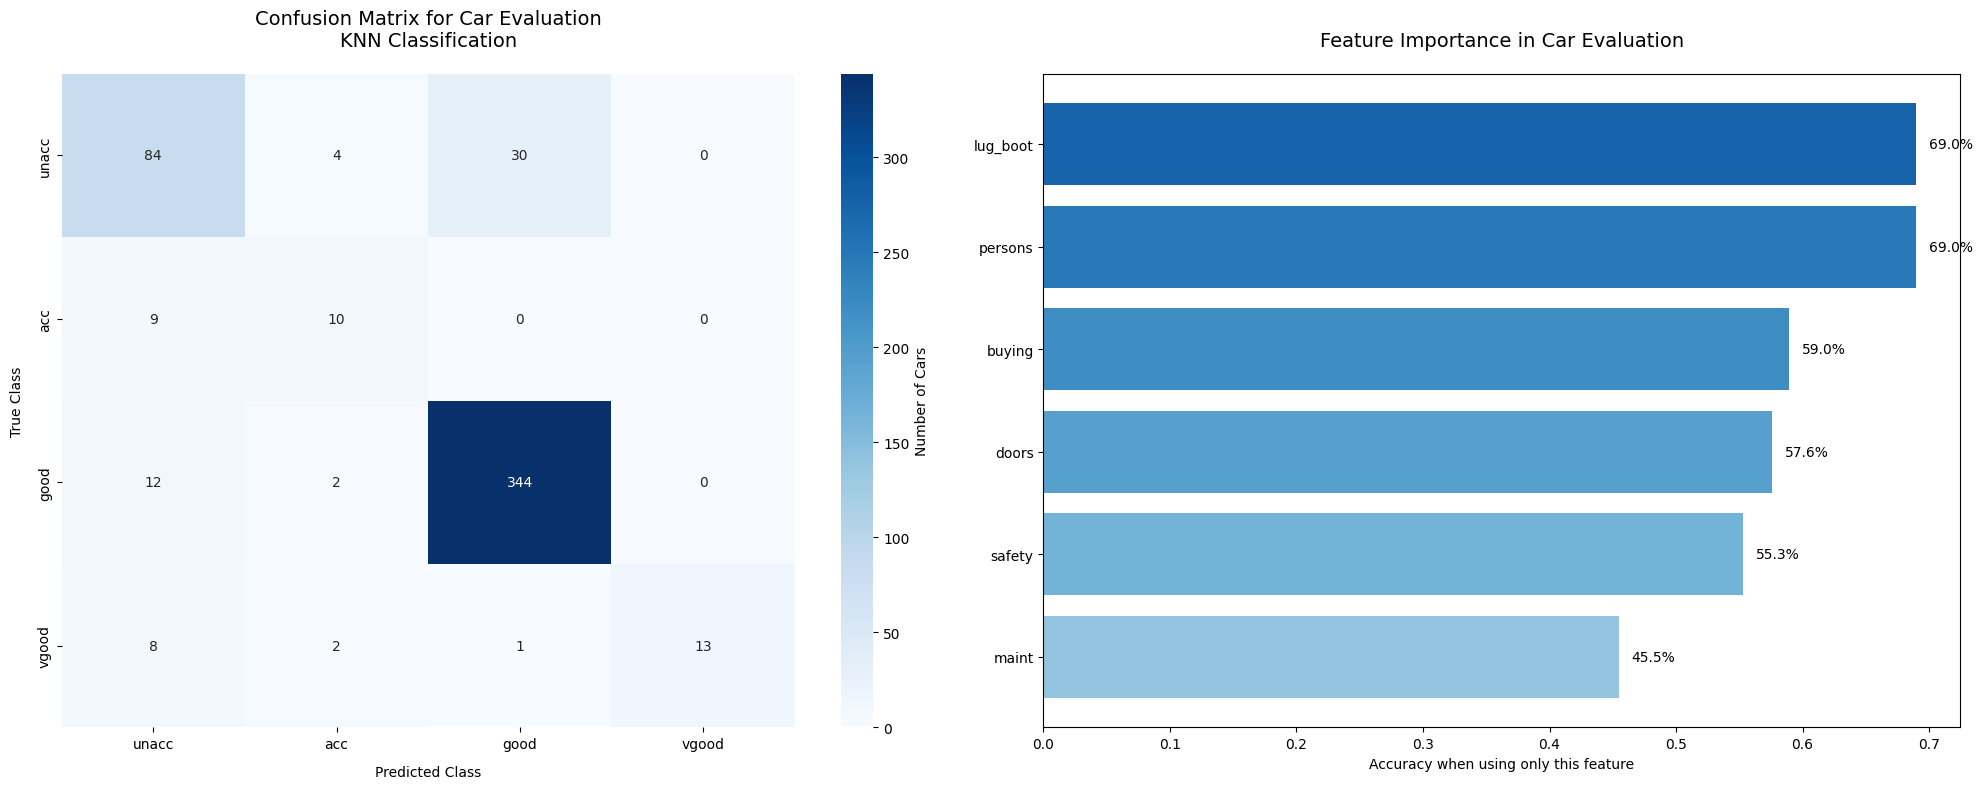


Model Performance Metrics:
--------------------------------------------------
Overall Accuracy: 86.90%

Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

       unacc       0.74      0.71      0.73       118
         acc       0.56      0.53      0.54        19
        good       0.92      0.96      0.94       358
       vgood       1.00      0.54      0.70        24

    accuracy                           0.87       519
   macro avg       0.80      0.69      0.73       519
weighted avg       0.87      0.87      0.87       519


Feature Importance Summary:
--------------------------------------------------
persons   : 68.98%
lug_boot  : 68.98%
buying    : 58.96%
doors     : 57.61%
safety    : 55.30%
maint     : 45.47%
Mean Absolute Error: 0.25
0.72 accuracy with a standard deviation of 0.02


In [4]:
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 3. Make predictions
y_pred = knn.predict(X_test)

# 4. Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            ax=ax1,
            cbar_kws={'label': 'Number of Cars'})

ax1.set_title('Confusion Matrix for Car Evaluation\nKNN Classification', pad=20, fontsize=14)
ax1.set_xlabel('Predicted Class', labelpad=10)
ax1.set_ylabel('True Class', labelpad=10)

# Calculate accuracy for each feature
feature_importance = {}
for feature in feature_names:
    X_single = X_encoded[[feature]]
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
        X_single, y_encoded, test_size=0.3, random_state=42
    )

    knn_single = KNeighborsClassifier(n_neighbors=3)
    knn_single.fit(X_train_single, y_train_single)
    accuracy = accuracy_score(y_test_single, knn_single.predict(X_test_single))
    feature_importance[feature] = accuracy

# Plot 2: Feature Importance
importance_df = pd.DataFrame(list(feature_importance.items()),
                           columns=['Feature', 'Accuracy'])
importance_df = importance_df.sort_values('Accuracy', ascending=True)

# Using matplotlib's barh instead of seaborn
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(feature_names)))
ax2.barh(range(len(importance_df)), importance_df['Accuracy'], color=colors)
ax2.set_yticks(range(len(importance_df)))
ax2.set_yticklabels(importance_df['Feature'])
ax2.set_title('Feature Importance in Car Evaluation', fontsize=14, pad=20)
ax2.set_xlabel('Accuracy when using only this feature')

# Add percentage labels to the bars
for i, v in enumerate(importance_df['Accuracy']):
    ax2.text(v + 0.01, i, f'{v:.1%}', va='center')

# Adjust layout
plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nModel Performance Metrics:")
print("-" * 50)
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=class_names))

# Feature importance summary
print("\nFeature Importance Summary:")
print("-" * 50)
for feature, acc in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature:<10}: {acc:.2%}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

from sklearn import svm
from sklearn.model_selection import cross_val_score

# Use the encoded X and y
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X_encoded, y_encoded, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


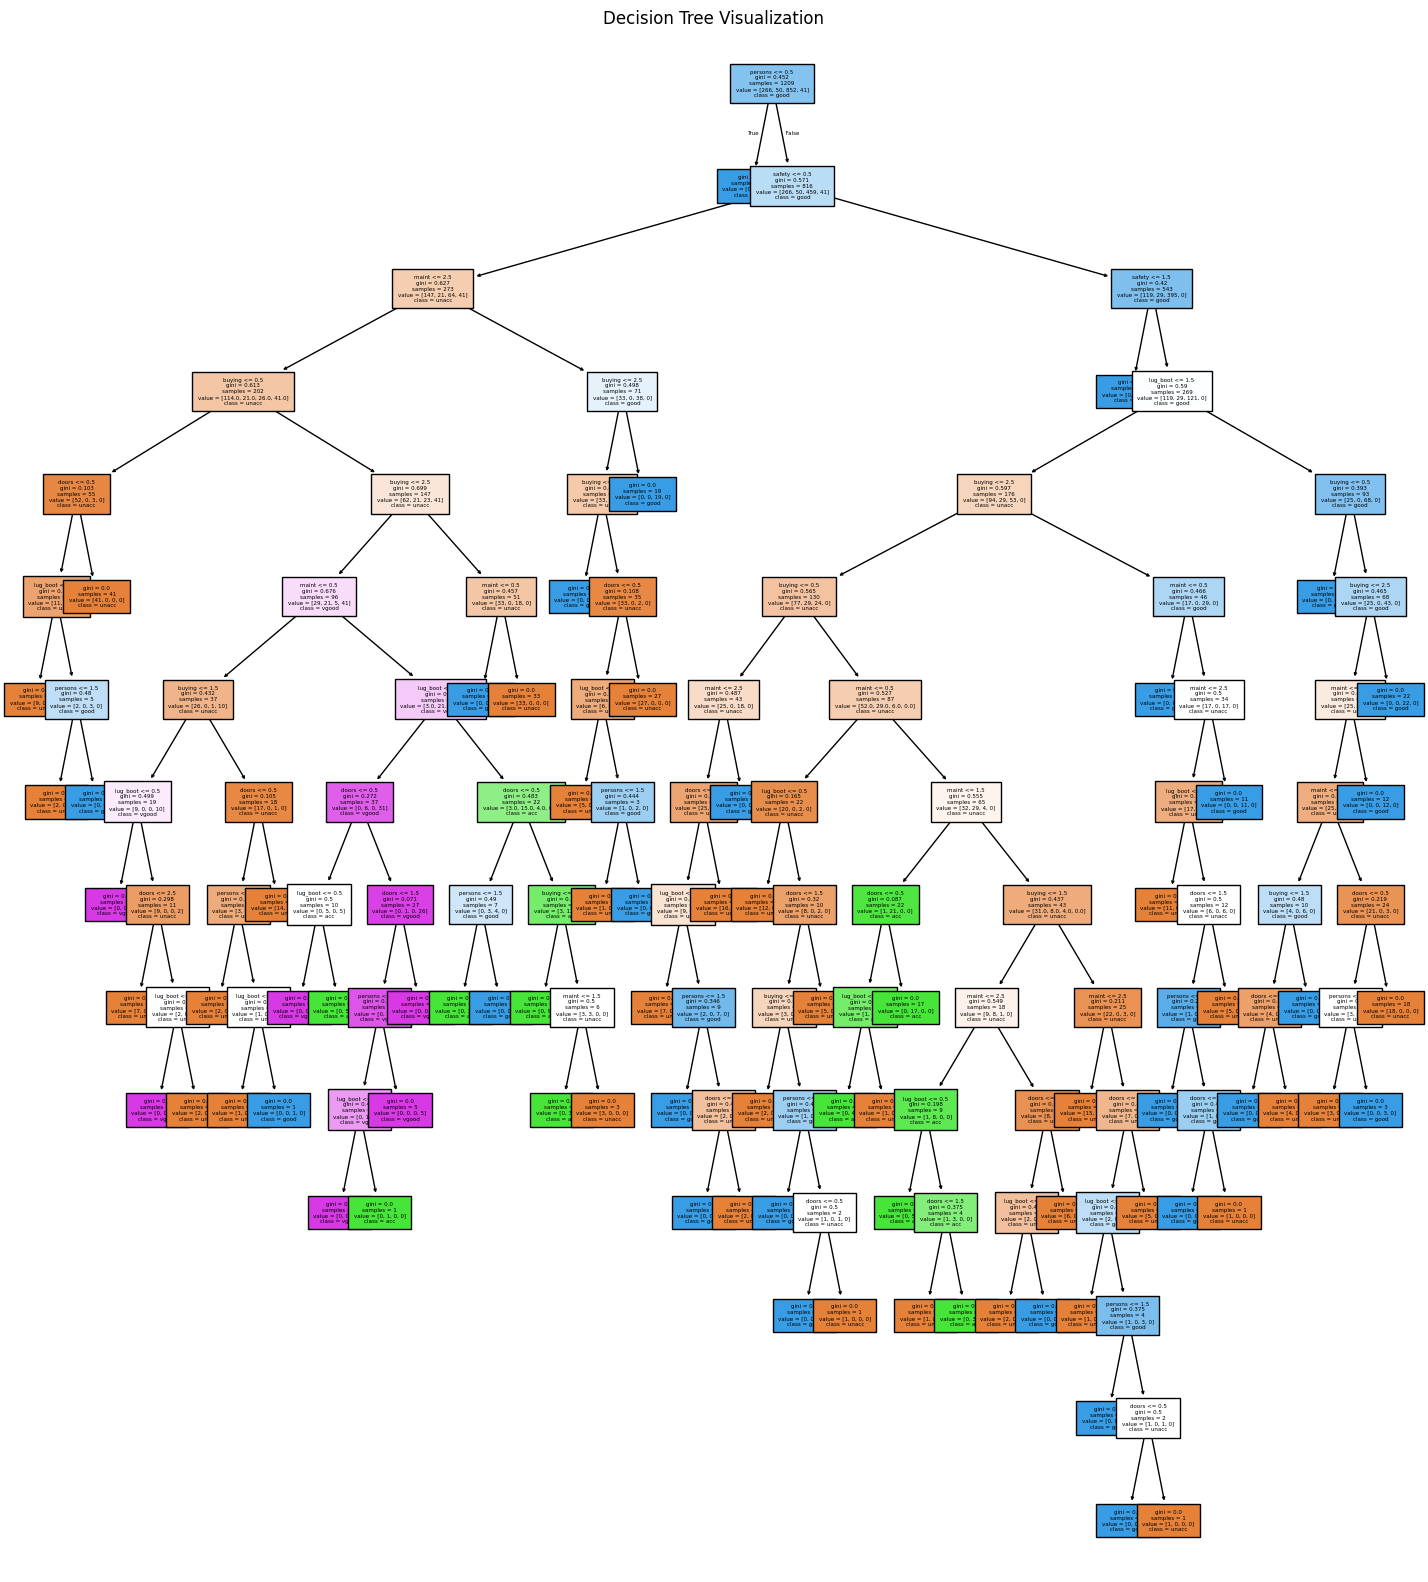

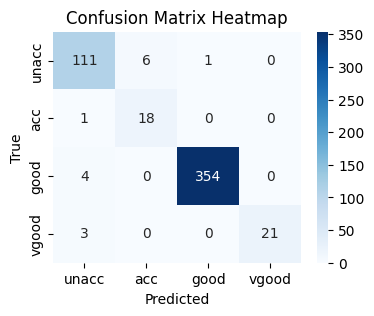

Accuracy: 0.97
Confusion Matrix:
[[111   6   1   0]
 [  1  18   0   0]
 [  4   0 354   0]
 [  3   0   0  21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519



In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualize the Decision Tree
plt.figure(figsize=(18, 20))  # Increase the size of the figure
plot_tree(
    clf,
    filled=True,
    feature_names=feature_names,
    class_names=class_names,
    fontsize=4  # Adjust the font size for better readability
)
plt.title("Decision Tree Visualization")
plt.show()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
